## Introduction
This notebook is used to illustrate:

1. Not every dollar invested in a share of stock is equal in terms of risk and reward.
2. Investors can use the tool of options to control the risk and reward of their investment.
3. For example, an investor can establish a "virtual" emergency fund even when they hold a long position with their entire investment portfolio.

This notebook assumes the reader is familiar with options.


In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load data for illustration
Use prices of the options of SPY ETF that expire on 2024-01-19. The prices were recorded at market close of 2023-11-24. The stock price at that time was 455.30

In [9]:
# load the illustrative data
df_opt = pd.read_csv('spy_20231124_20240119.csv')

# select columns
df_opt = df_opt[['Strike', 'Call Price', 'Put Price']]

# set index to Strike
df_opt = df_opt.set_index('Strike')


## Example: The same amount of investment with different risks/rewards 
Define the function that calculates the return of owning a call option when stock (SPY) price hits different possible prices at the option expiration.

In [48]:
# price range
p = np.linspace(250, 550, 301)

def call_option_return(price, strike):
    return np.maximum(price - strike, 0) - float(df_opt.loc[strike, 'Call Price'])

Assume the investor has $5000. Different investing strategies exist for different risk/reward.

Strategy 1: Buy one call option with strike price = 408

Investment amount: 4986.0


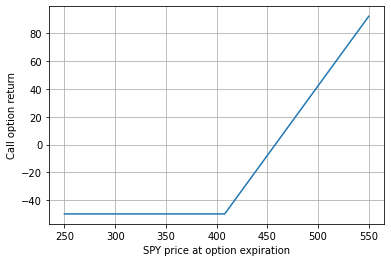

In [103]:
strike = 408
plt.plot(p,call_option_return(p, strike))
plt.grid(True)
plt.xlabel('SPY price at option expiration')
plt.ylabel('Call option return')
print(f'Investment amount: {100 * float(df_opt.loc[strike, "Call Price"])}')

Strategy 2: Another way to invest $5000 is buying one call option with strike price = 355 while selling one call option with strike price = 408. This strategy is less risky with lower potential reward comparing with Strategy 1.

Investment amount: 5014.0


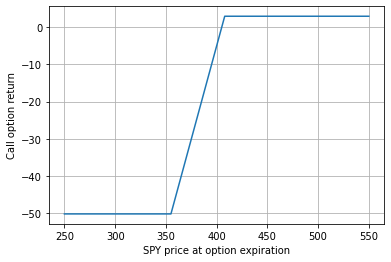

In [105]:
strike1 = 408
strike2 = 355
plt.plot(p,call_option_return(p, strike2) - call_option_return(p, strike1))
plt.grid(True)
plt.xlabel('SPY price at option expiration')
plt.ylabel('Call option return')
print(f'Investment amount: {100*float(df_opt.loc[strike2, "Call Price"]) - 100*float(df_opt.loc[strike1, "Call Price"])}')

Strategy 3: Buy one call option with strike price = 305 and sell one call option with strike price = 355. This strategy is least risky with lowerest potential reward comparing with Strategy 1 and Strategy 2.

Investment amount: 5019.999999999998


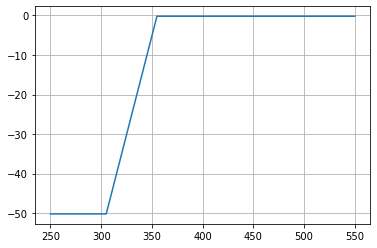

In [104]:
strike1 = 355
strike2 = 305
plt.plot(p,call_option_return(p, strike2) - call_option_return(p, strike1))
plt.grid(True)
print(f'Investment amount: {100*float(df_opt.loc[strike2, "Call Price"]) - 100*float(df_opt.loc[strike1, "Call Price"])}')

## Establish a "virtual" emergency fund
Based on above observations, we can see a method of establishing a "virtual" emergency fund in our investment portfolio. The conventional approach of parking an emergency fund is to use a low risk / low reward investment such as a bond or a savings account. However, we notice that, even when we have all our wealth invested in stocks, we can still withdraw the "low risk/ low reward portion" from our investment portfolio if an emergency arises. 

Use the data above for instance. Suppose that we hold a call option with strike price of 260. If we have an emergent need for fund, we can roll this call option to the strike price of 350. This essentially allows us to withdraw $8863 from the investment. As seen in the plot below, this withdraw will only slightly hurt the potential to earn a return if stock price arises, and prevent losses if the price drops below 350 (small probability).


Fund withdrawn: 8863.0


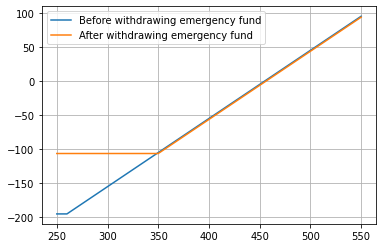

In [96]:
strike2 = 260
plt.plot(p,call_option_return(p, strike2))
strike1 = 350
plt.plot(p,call_option_return(p, strike1))
plt.grid(True)
plt.legend(['Before withdrawing emergency fund', 'After withdrawing emergency fund'])
print(f'Fund withdrawn: {100*float(df_opt.loc[strike2, "Call Price"]) - 100*float(df_opt.loc[strike1, "Call Price"])}')
